## This notebook is for pre-processing liveability factor data

### 1. Setting up the coding environment (Nene)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Function to save cleaned dataframe

def save_data(dataframe, dest: str, name: str):
    file = os.path.join(dest, name)  # dest/name

    # If the file is not existing...
    if not os.path.isfile(file):
        print(f"{file} not found, saving...")
        path = os.path.split(dest)  # dest1, dest2

        # Make sure the destination file exits
        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        # Save the file
        dataframe.to_csv(file, index=False)

        print("\tDone saving.")

    else:
        print(f"Found {file} locally, done!")

    return

### 2. Housing data (Nene)

In [24]:
# Reading in the data

file = os.path.join('data', 'raw', 'housing_data_ward.csv')
cols = ['Ward name', 'New code', 'Median House Price (£) - 2014']


df_housing = pd.read_csv(file, usecols = cols, encoding= 'unicode_escape')
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ward name                      660 non-null    object 
 1   New code                       660 non-null    object 
 2   Median House Price (£) - 2014  660 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.6+ KB


In [25]:
# Renaming columns
df_housing.rename(columns={"Ward name": "ward_name", 
                           "New code": "new_code",
                           "Median House Price (£) - 2014": "median_house"},
                  inplace=True)

<AxesSubplot:ylabel='Frequency'>

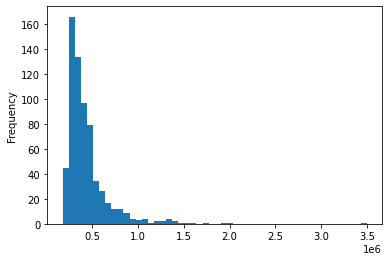

In [26]:
df_housing.median_house.plot.hist(bins=50)

In [29]:
# Take logarithm
df_housing["median_house_log"]= np.log(df_housing.median_house)

<AxesSubplot:ylabel='Frequency'>

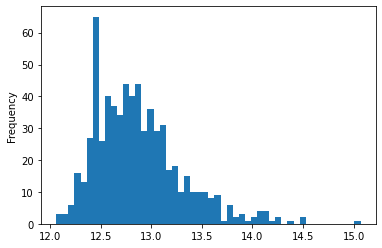

In [30]:
df_housing.median_house_log.plot.hist(bins=50)

In [31]:
# Standard deviation of the new distribution:
df_housing.median_house_log.std()

0.4315805146349902

In [32]:
# Mean of the new distribution:
df_housing.median_house_log.mean()

12.86974784026538

### 3. Indexed liveability index (Richy)

### 4. Combining and outputing data (Richy)

In [ ]:
# Saving the combined dataframe into csv
'''
dest = os.path.join("data", "clean")
name = "df_data_final.csv"

save_data(df_combined, dest, name)
'''

### 